### Load Library:

In [ ]:
import numpy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Dataset Preparation:

In [12]:
data = pd.read_csv('DIA_trainingset_RDKit_descriptors.csv') # load dataset

instances = data.iloc[:-1, 1:] # get instances
labels = data.iloc[:-1, 1] # get labels

# Include only continuous and numerical features
instances = instances.select_dtypes(include=[np.number]) # select only numerical features
#instances = instances.dropna(axis=1, how='any') # drop columns with NaN values
#instances = instances.drop(columns=['ID']) # drop ID column

#instances = instances.drop(columns=['SMILES']) # drop SMILES column

### Traditional Manifold:

PCA Components:
[[-0.08669729  0.14259569  0.16406871  0.16162369  0.16167933  0.16265496
   0.15912884  0.15967224  0.15633376  0.15630695  0.14812019  0.14808876
   0.13859608  0.14116651  0.10834302  0.10438221  0.04253855  0.10345415
   0.07754605  0.04644252  0.04335304  0.05653131  0.04302221  0.01482548
   0.03975607  0.16089951  0.03323477 -0.0947445   0.16373224  0.15938147
   0.05247243  0.15865341  0.12892712 -0.01814772  0.16266036  0.10092901
   0.03210947  0.10092901  0.04974023 -0.05415917  0.05571516 -0.03355296
  -0.03465435  0.03546949  0.15730347  0.16084114  0.04817202  0.11631727
   0.05948712  0.07766471  0.09588052  0.02225062  0.01903377  0.02874678
   0.12098182  0.05852671  0.11026503 -0.          0.09055474  0.05281244
   0.07688953  0.09080616  0.16441419  0.10210396  0.07975364  0.06136599
   0.05750829  0.02122601  0.04521549  0.08682959  0.03246611 -0.00733886
   0.00599917  0.05841151  0.09241776  0.08616365  0.08691835  0.10725359
   0.11200342  0.06015

ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not 0      COC(=O)N(C)c1c(N)nc(nc1N)c2nn(Cc3ccccc3F)c4ncc...
1                        C[C@H](N(O)C(=O)N)c1cc2ccccc2s1
2                                  C[N+](C)(C)CC(=O)[O-]
3      CC(C)n1c(\C=C\[C@H](O)C[C@H](O)CC(=O)O)c(c2ccc...
4               C\C(=C(\C#N)/C(=O)Nc1ccc(cc1)C(F)(F)F)\O
                             ...                        
471           CC(=O)Oc1ccccc1C(=O)Nc2ncc(s2)[N+](=O)[O-]
472                            C(C1=NCCN1)c2cccc3ccccc23
473    C[N@+]1(CC2CC2)CC[C@]34[C@H]5Oc6c(O)ccc(C[C@@H...
474    CO\N=C(/C(=O)N[C@H]1[C@H]2SCC(=C(N2C1=O)C(=O)O...
475     Clc1ccc(CO\N=C(\Cn2ccnc2)/c3ccc(Cl)cc3Cl)c(Cl)c1
Name: Label, Length: 476, dtype: object

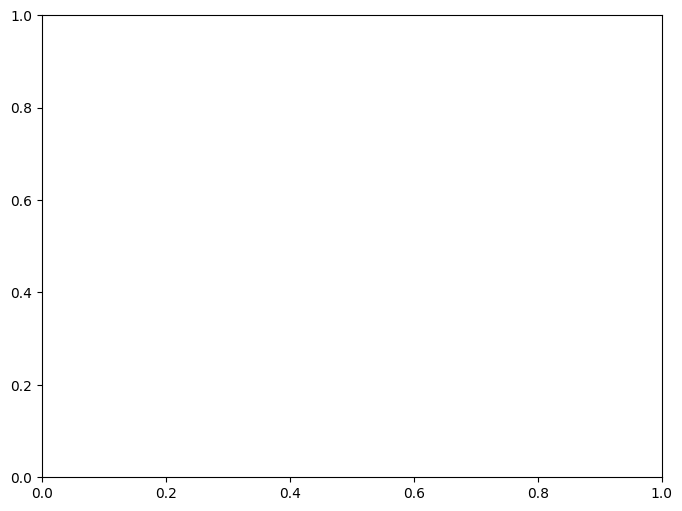

In [ ]:
# Apply PCA to the dataset
from sklearn.preprocessing import StandardScaler  # Standardize the data
from sklearn.decomposition import PCA # PCA module

# Standrize: its important to standrize the data before implementing PCA 
scaler = StandardScaler() # create a StandardScaler object
scaler.fit(instances) # fit the scaler to the data
instances = scaler.transform(instances) # transform the data

# Perform PCA
no_components = 5 # number of components to keep
pca = PCA(n_components= no_components) # reduce to 2 dimensions
pca_result = pca.fit_transform(instances) # fit and transform the data

# Create a DataFrame with PCA results and labels
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2']) # create DataFrame with PCA results
pca_df['Label'] = labels # add labels to DataFrame

# Plot: print the obtained PCA components and explained variance
print("PCA Components:")
print(pca.components_) # print PCA components
print("Explained Variance Ratio:")
print(pca.explained_variance_ratio_) # print explained variance ratio
print("Explained Variance:")
print(pca.explained_variance_) # print explained variance
print("Mean:")
print(pca.mean_) # print mean of the data

# plot PCA results
plt.figure(figsize=(8, 6)) # set figure size
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Label'], cmap='viridis', alpha=0.5) # scatter plot
plt.title('PCA of RDKit Descriptors') # set title
plt.xlabel('Principal Component 1') # set x-axis label
plt.ylabel('Principal Component 2') # set y-axis label
plt.colorbar(label='Label') # add color bar
plt.grid() # add grid
plt.show() # show plot


### Modeling Manifold: